## Introduction:

Recommender systems are being used by every major online platform to personalize the experience of their users. I have created a song recommender system which will understand and analyze audio features. The model will then recommend 10 songs based on my playlist and liked songs. 

### Data:

I have used the Spotify API for Python called Spotipy to extract features of the songs in the playlists. 6 Spotify playlists of different genres were used to build the database. The playlists encompass the following the genres:

1. Jazz
2. Rock
3. Punk Rock
4. R&B
5. Pop
6. Electro Swing

In [206]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import time
from scipy import stats
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [68]:
# importing the spotipy API
!pip install spotipy

In [69]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


Setting up the Spotipy API. Client_credentials_manager is used to authenitcate the client using their id and client_secret key. 

In [70]:
#Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id='93c24bd35a4b49c290aa05d813a2e22f', client_secret='8233d3ab6903421ea82b329756fbf832')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

# Approach 1

In [113]:
# # Getting track ids
# def getTrackIDs(user, playlist_id):
#     ids = []
#     playlist = sp.user_playlist(user, playlist_id)
#     for item in playlist['tracks']['items']:
#         track = item['track']
#         ids.append(track['id'])
#     return ids

# ids = getTrackIDs('angelicadietzel', '37i9dQZF1DXaXB8fQg7xif')

In [115]:
# def getTrackFeatures(id):
#   meta = sp.track(id)
#   features = sp.audio_features(id)
# #   artist_info = sp.artist(id)


#   # meta
#   name = meta['name']
#   album = meta['album']['name']
#   artist = meta['album']['artists'][0]['name']
#   release_date = meta['album']['release_date']
#   length = meta['duration_ms']
#   popularity = meta['popularity']
# #   genre = artist_info['genres']




#   # features
#   acousticness = features[0]['acousticness']
#   danceability = features[0]['danceability']
#   energy = features[0]['energy']
#   instrumentalness = features[0]['instrumentalness']
#   liveness = features[0]['liveness']
#   loudness = features[0]['loudness']
#   speechiness = features[0]['speechiness']
#   tempo = features[0]['tempo']
#   time_signature = features[0]['time_signature']

#   track = [name, album, artist,release_date, length, popularity, danceability, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
#   return track

In [116]:
# tracks = []
# for i in range(len(ids)):
# #   time.sleep(.5)
#   track = getTrackFeatures(ids[i])
#   tracks.append(track)

# # create dataset
# df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])
# df.to_csv("spotify_dance.csv", sep = ',')

# Final Approach: Using song URIs to extract features using Spotify API

The playlist URL of the selected Spotify playlists were used to extract their URIs. URI is a unique id for eac playlist. In addition, each song has a unique track_URI which will be used to extract the song features. 

For this analysis, I have used song and artist features as below:

1. track_name
2. artist_uri
3. artist_info
4. artist_name
5. artist_pop: Popularity of the artist
6. artist_genres
7. album
8. track_pop: Popularity of the track

The above features describe the song and the artists. Additionally, descriptive features of the song which detail the coherent elements of the track have been extracted. There are as follows:

1. acousticness
2. danceability
3. energy
4. instrumentalness
5. liveness
6. loudness
7. speechiness
8. tempo
9. time_signature

In [71]:
# Extracting tracks from a playlist 
playlist_link = "https://open.spotify.com/playlist/71s4ARJ1ErLpDldhHwhFTU"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

In [72]:
# The below funciton will extract features of the songs
def get_dets(playlist_URI):
    
    tracks = []
    for track in sp.playlist_tracks(playlist_URI)["items"]:
        
        track_uri = track["track"]["uri"]
        features = sp.audio_features(track_uri)



        #Track name
        track_name = track["track"]["name"]

        #Main Artist
        artist_uri = track["track"]["artists"][0]["uri"]
        artist_info = sp.artist(artist_uri)

        #Name, popularity, genre
        artist_name = track["track"]["artists"][0]["name"]
        artist_pop = artist_info["popularity"]
        artist_genres = artist_info["genres"]

        #Album
        album = track["track"]["album"]["name"]

        #Popularity of the track
        track_pop = track["track"]["popularity"]
        
        # features
        acousticness = features[0]['acousticness']
        danceability = features[0]['danceability']
        energy = features[0]['energy']
        instrumentalness = features[0]['instrumentalness']
        liveness = features[0]['liveness']
        loudness = features[0]['loudness']
        speechiness = features[0]['speechiness']
        tempo = features[0]['tempo']
        time_signature = features[0]['time_signature']



        info = [track_uri, track_name, artist_name, artist_pop, artist_genres, album, track_pop, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
        tracks.append(info)
        
    return tracks
        

In [73]:
track_features = get_dets(playlist_URI)

In [74]:
# Creating a dataframe of the features
df = pd.DataFrame(track_features, columns=["track_uri", 'track_name', 'artist_name', 'artist_pop', 'artist_genres', 'album', 'track_pop', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])


In [75]:
df.shape

(36, 16)

In [80]:
# Saving the data to a csv
df.to_csv('my_playlist.csv')

# 2. Working on the data

In [2]:
# Reading the data
df = pd.read_csv("song_data.csv")

In [3]:
df.head()

,Unnamed: 0,track_uri,track_name,artist_name,artist_pop,artist_genres,album,track_pop,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,spotify:track:4Dvkj6JhhA12EX05fT7y2e,As It Was,Harry Styles,94,['pop'],Harry's House,90,0.3420,0.520,0.731,0.001010,0.3110,-5.338,0.0557,173.930,4
1,1,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,Me Porto Bonito,Bad Bunny,100,"['latin', 'reggaeton', 'trap latino']",Un Verano Sin Ti,96,0.0901,0.911,0.712,0.000027,0.0933,-5.105,0.0817,92.005,4
2,2,spotify:track:3k3NWokhRRkEPhCzPmV8TW,Ojitos Lindos,Bad Bunny,100,"['latin', 'reggaeton', 'trap latino']",Un Verano Sin Ti,96,0.0800,0.647,0.686,0.000001,0.5280,-5.745,0.0413,79.928,4
3,3,spotify:track:75FEaRjZTKLhTrFGsfMUXR,Running Up That Hill (A Deal With God),Kate Bush,71,"['art pop', 'art rock', 'baroque pop', 'new wa...",Hounds Of Love,82,0.7200,0.629,0.547,0.003140,0.0604,-13.123,0.0550,108.375,4
4,4,spotify:track:1IHWl5LamUGEuP4ozKQSXZ,Tití Me Preguntó,Bad Bunny,100,"['latin', 'reggaeton', 'trap latino']",Un Verano Sin Ti,94,0.0993,0.650,0.715,0.000291,0.1260,-5.198,0.2530,106.672,4


In [4]:
df.tail()

,Unnamed: 0,track_uri,track_name,artist_name,artist_pop,artist_genres,album,track_pop,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
660,95,spotify:track:3iWOZkQNDekZQqkiJqqeGy,Say It Right - Sped Up Remix,Nelly Furtado,74,"['canadian latin', 'canadian pop', 'dance pop'...",Say It Right (Sped Up Remix),68,0.02690,0.849,0.941,0.007170,0.0596,-6.448,0.2230,134.479,4
661,96,spotify:track:7zwn1eykZtZ5LODrf7c0tS,You Get Me So High,The Neighbourhood,82,"['modern alternative rock', 'modern rock', 'po...",Hard To Imagine The Neighbourhood Ever Changing,80,0.18600,0.551,0.881,0.079100,0.1520,-6.099,0.0542,88.036,4
662,97,spotify:track:27rdGxbavYJeBphck5MZAF,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,74,"['dance pop', 'pop']",Nothing Breaks Like a Heart (feat. Miley Cyrus),78,0.00987,0.601,0.794,0.000001,0.3880,-5.844,0.0671,114.066,4
663,98,spotify:track:1pKYYY0dkg23sQQXi0Q5zN,Around the World,Daft Punk,79,"['electro', 'filter house']",Homework,75,0.00356,0.956,0.795,0.889000,0.0906,-5.311,0.1500,121.294,4
664,99,spotify:track:4FYWOYqOF9lbb1JcZFDT67,Cool for the Summer - Sped Up (Nightcore),Demi Lovato,79,"['dance pop', 'pop', 'post-teen pop']",Cool for the Summer [Sped Up (Nightcore)],73,0.00751,0.561,0.599,0.000701,0.3160,-8.209,0.0749,125.874,4


In [5]:
# Checking the data types
df.dtypes

Unnamed: 0            int64
track_uri            object
track_name           object
artist_name          object
artist_pop            int64
artist_genres        object
album                object
track_pop             int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
time_signature        int64
dtype: object

In [6]:
df.describe()

,Unnamed: 0,artist_pop,track_pop,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000
mean,40.646617,63.945865,59.670677,0.213516,0.658260,0.666037,0.168536,0.173310,-7.315388,0.098348,119.238198,3.968421
std,27.285912,17.001685,22.365087,0.247832,0.154637,0.201466,0.307597,0.128507,3.207468,0.089895,27.302402,0.264167
min,0.000000,12.000000,0.000000,0.000013,0.168000,0.039400,0.000000,0.032800,-24.086000,0.025500,62.229000,1.000000
25%,18.000000,51.000000,50.000000,0.022100,0.554000,0.521000,0.000001,0.091700,-9.141000,0.041900,97.022000,4.000000
50%,36.000000,65.000000,63.000000,0.106000,0.676000,0.701000,0.000376,0.118000,-6.448000,0.061300,121.030000,4.000000
75%,61.000000,76.000000,76.000000,0.328000,0.775000,0.829000,0.121000,0.215000,-5.076000,0.110000,130.075000,4.000000
max,99.000000,100.000000,100.000000,0.973000,0.971000,0.996000,0.963000,0.882000,-1.637000,0.703000,205.278000,5.000000


In [7]:
df.artist_genres[1]

"['latin', 'reggaeton', 'trap latino']"

## Data Exploration

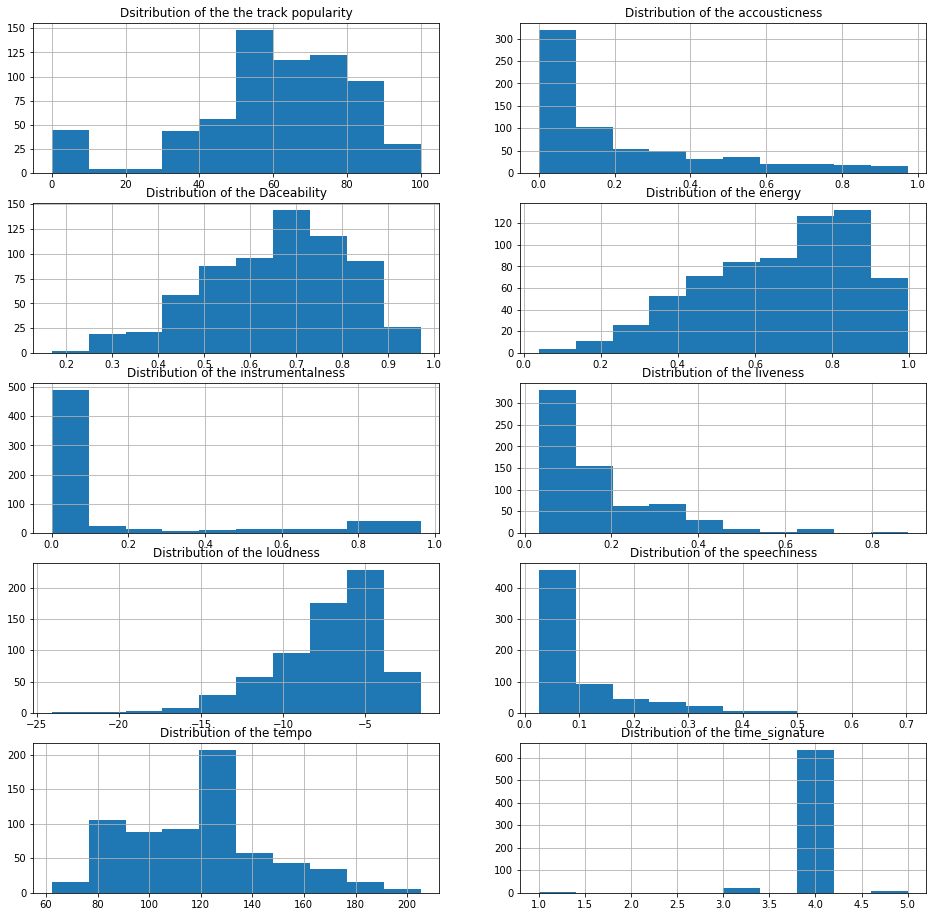

In [8]:
# Plotting histograms of the numeric features
plt.figure(figsize=(16,16))

plt.subplot(5,2,1)
df.track_pop.hist()
plt.title("Dsitribution of the the track popularity")

plt.subplot(5,2,2)
df.acousticness.hist()
plt.title("Distribution of the accousticness")

plt.subplot(5,2,3)
df.danceability.hist()
plt.title("Distribution of the Daceability")

plt.subplot(5,2,4)
df.energy.hist()
plt.title("Distribution of the energy")

plt.subplot(5,2,5)
df.instrumentalness.hist()
plt.title("Distribution of the instrumentalness")

plt.subplot(5,2,6)
df.liveness.hist()
plt.title("Distribution of the liveness")

plt.subplot(5,2,7)
df.loudness.hist()
plt.title("Distribution of the loudness")

plt.subplot(5,2,8)
df.speechiness.hist()
plt.title("Distribution of the speechiness")

plt.subplot(5,2,9)
df.tempo.hist()
plt.title("Distribution of the tempo")

plt.subplot(5,2,10)
df.time_signature.hist()
plt.title("Distribution of the time_signature")
plt.show()

The above distributions of the numeric variabels show that a few features do not follow a normal distribution. A normal distribution is important as it will remove the skewness from our data and make the modeling process more interpretable and the statistical analysis results from the data are more vivid. I will perform a log transformation on the following features:

1. Accousticness
2. track_popularity
3. Energy
4. Instrumentalness
5. Liveness
6. Loudness
7. Speechiness
8. Tempo
9. time_signature

In [9]:
# Checking for null values
df.isna().sum()

Unnamed: 0          0
track_uri           0
track_name          0
artist_name         0
artist_pop          0
artist_genres       0
album               0
track_pop           0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

The data contains no null values.

Next I will drop the unnamed column 

In [10]:
df.head()

,Unnamed: 0,track_uri,track_name,artist_name,artist_pop,artist_genres,album,track_pop,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,spotify:track:4Dvkj6JhhA12EX05fT7y2e,As It Was,Harry Styles,94,['pop'],Harry's House,90,0.3420,0.520,0.731,0.001010,0.3110,-5.338,0.0557,173.930,4
1,1,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,Me Porto Bonito,Bad Bunny,100,"['latin', 'reggaeton', 'trap latino']",Un Verano Sin Ti,96,0.0901,0.911,0.712,0.000027,0.0933,-5.105,0.0817,92.005,4
2,2,spotify:track:3k3NWokhRRkEPhCzPmV8TW,Ojitos Lindos,Bad Bunny,100,"['latin', 'reggaeton', 'trap latino']",Un Verano Sin Ti,96,0.0800,0.647,0.686,0.000001,0.5280,-5.745,0.0413,79.928,4
3,3,spotify:track:75FEaRjZTKLhTrFGsfMUXR,Running Up That Hill (A Deal With God),Kate Bush,71,"['art pop', 'art rock', 'baroque pop', 'new wa...",Hounds Of Love,82,0.7200,0.629,0.547,0.003140,0.0604,-13.123,0.0550,108.375,4
4,4,spotify:track:1IHWl5LamUGEuP4ozKQSXZ,Tití Me Preguntó,Bad Bunny,100,"['latin', 'reggaeton', 'trap latino']",Un Verano Sin Ti,94,0.0993,0.650,0.715,0.000291,0.1260,-5.198,0.2530,106.672,4


## Importing my playlist data

In [11]:
# Importing my playlist data
pl = pd.read_csv("my_playlist.csv")

In [12]:
pl.head()

,Unnamed: 0,track_uri,track_name,artist_name,artist_pop,artist_genres,album,track_pop,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,spotify:track:2glRwrbsXM6p1AW1UESGtS,Funking Around,Me & My Toothbrush,43,"['deep house', 'disco house', 'funky house', '...",Funking Around,47,0.02580,0.811,0.928,0.00796,0.0436,-4.367,0.0390,123.998,4
1,1,spotify:track:5LYMamLv12UPbemOaTPyeV,Music For a Sushi Restaurant,Harry Styles,94,['pop'],Harry's House,90,0.25800,0.720,0.715,0.05680,0.1070,-4.652,0.0400,107.041,4
2,2,spotify:track:1ZgQnD9g6koKGpBUmYDBNq,Serious Mood,Point Point,38,"['future bass', 'new french touch', 'vapor twi...",Serious Mood,36,0.00733,0.676,0.867,0.91100,0.2400,-6.387,0.0724,180.029,4
3,3,spotify:track:5wroYfXQb6ytyIWRC0lUoT,Discopolis 2.0 - Original Rework,Lifelike,40,"['filter house', 'nu disco']",Discopolis 2.0,32,0.01130,0.631,0.952,0.91800,0.2270,-2.447,0.0295,119.990,4
4,4,spotify:track:571TjaPDo1NCItCkTBoYt1,Munky Fonkey,Jon Bovi,26,[],Wad Morld,26,0.01150,0.836,0.606,0.85100,0.0832,-8.200,0.0542,122.019,4


### Appending the my playlist with the training data to conduct feature engineering

In [80]:
# Concatinating my playlist data with training data
full = pd.concat([df, pl])

In [81]:
full.shape

(701, 17)

In [82]:
#dropping unnamed column
full.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

On inspecting the artist_genre column, its evident the data is in the string format and not a list. Hence I will convert the genres into a list next. 

In [83]:
full['genres'] = full['artist_genres'].apply(lambda x: [re.sub(' ','_',i) for i in re.findall(r"'([^']*)'", x)])

Next, I want to create a TF-IDF vector of the genre column. 

In [161]:
# Creating a fucntion which will create tfidf vectors, and perform min max scaling
def create_tfidf(df):
    vect = TfidfVectorizer(stop_words='english')
    temp = vect.fit_transform(df['genres'].apply(lambda x: " ".join(x)))
    temp2 = pd.DataFrame(temp.toarray())
    temp2.columns = ['genre'+'|'+ i for i in vect.get_feature_names()]
    temp2.reset_index(drop=True, inplace=True)
    
    # Minmax scaling the numeric columns
    scaler = MinMaxScaler()
    float_cols = df.dtypes[df.dtypes == 'float64'].index.values
    floats = df[float_cols].reset_index(drop=True)
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns=floats.columns)
    
    # Extracting the values of dtype int64
    int_cols = df.dtypes[df.dtypes == 'int64'].index.values
    ints = df[int_cols].reset_index(drop=True)
    int_scaled = pd.DataFrame(scaler.fit_transform(ints), columns=ints.columns)
    
    # Extracting the Object type values
    obj_cols = df.dtypes[df.dtypes=='object'].index.values
    objects = df[obj_cols].reset_index(drop=True)
    
    
    res = pd.concat([objects, floats_scaled, int_scaled, temp2], axis=1)
    
    res['track_uri'] = df['track_uri']

    
    return res

In [157]:
full.dtypes

track_uri                  object
track_name                 object
artist_name                object
artist_pop                  int64
artist_genres              object
                           ...   
genre|washington_indie    float64
genre|weirdcore           float64
genre|west_coast_rap      float64
genre|yacht_rock          float64
genre|zolo                float64
Length: 381, dtype: object

In [159]:
# Creating a dataframe with the TF_IDF features
int_cols = full.dtypes[full.dtypes == 'int64'].index.values
ints = full[int_cols].reset_index(drop=True)
int_scaled = pd.DataFrame(scaler.fit_transform(ints), columns=ints.columns)

In [160]:
int_scaled.head()

,artist_pop,track_pop,time_signature
0,0.938144,0.90,0.75
1,1.000000,0.96,0.75
2,1.000000,0.96,0.75
3,0.701031,0.82,0.75
4,1.000000,0.94,0.75


In [162]:
res = create_tfidf(full)

In [163]:
res.head()

,track_uri,track_name,artist_name,artist_genres,album,genres,acousticness,danceability,energy,instrumentalness,...,genre|vapor_trap,genre|vapor_twitch,genre|vegas_indie,genre|viral_rap,genre|warrington_indie,genre|washington_indie,genre|weirdcore,genre|west_coast_rap,genre|yacht_rock,genre|zolo
0,spotify:track:4Dvkj6JhhA12EX05fT7y2e,As It Was,Harry Styles,['pop'],Harry's House,[pop],0.351482,0.438356,0.722977,0.001049,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,Me Porto Bonito,Bad Bunny,"['latin', 'reggaeton', 'trap latino']",Un Verano Sin Ti,"[latin, reggaeton, trap_latino]",0.092589,0.925280,0.703115,0.000028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,spotify:track:3k3NWokhRRkEPhCzPmV8TW,Ojitos Lindos,Bad Bunny,"['latin', 'reggaeton', 'trap latino']",Un Verano Sin Ti,"[latin, reggaeton, trap_latino]",0.082208,0.596513,0.675936,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,spotify:track:75FEaRjZTKLhTrFGsfMUXR,Running Up That Hill (A Deal With God),Kate Bush,"['art pop', 'art rock', 'baroque pop', 'new wa...",Hounds Of Love,"[art_pop, art_rock, baroque_pop, new_wave_pop,...",0.739976,0.574097,0.530629,0.003261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,spotify:track:1IHWl5LamUGEuP4ozKQSXZ,Tití Me Preguntó,Bad Bunny,"['latin', 'reggaeton', 'trap latino']",Un Verano Sin Ti,"[latin, reggaeton, trap_latino]",0.102044,0.600249,0.706251,0.000302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
# Selecting the full data without the string values and categorical values
full_data = res.drop(columns=['track_name','artist_name','artist_genres', 'album', 'genres'])

In [197]:
full_data.shape

(701, 740)

In [175]:
# Seperating the user playlist from the data to calculate the cosine similarity
user_playlist = full_data.iloc[665:]

In [201]:
# Dropping the playlist data from the dataset
full_data.drop(full_data.index[665:], axis=0, inplace=True)
full_data.shape

In [203]:
full_data.head(2)

,track_uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,genre|_hip_hop,...,genre|vapor_trap,genre|vapor_twitch,genre|vegas_indie,genre|viral_rap,genre|warrington_indie,genre|washington_indie,genre|weirdcore,genre|west_coast_rap,genre|yacht_rock,genre|zolo
0,spotify:track:4Dvkj6JhhA12EX05fT7y2e,0.351482,0.438356,0.722977,0.001049,0.324924,0.834097,0.044576,0.780858,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,0.092589,0.925280,0.703115,0.000028,0.070661,0.844463,0.082952,0.208152,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [204]:
user_playlist.head(2)

,track_uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,genre|_hip_hop,...,genre|vapor_trap,genre|vapor_twitch,genre|vegas_indie,genre|viral_rap,genre|warrington_indie,genre|washington_indie,genre|weirdcore,genre|west_coast_rap,genre|yacht_rock,genre|zolo
665,spotify:track:2glRwrbsXM6p1AW1UESGtS,0.026503,0.800747,0.928915,0.008266,0.012614,0.877297,0.019926,0.431803,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,spotify:track:5LYMamLv12UPbemOaTPyeV,0.265150,0.687422,0.706251,0.058982,0.086662,0.864617,0.021402,0.313263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating user feature vector

Now that we have the user playlist and all of its features ready, we will create a single user vector that using aggregation of the means

In [212]:
user_feature_vector = pd.DataFrame(user_playlist.mean(axis=0)).T

In [214]:
user_feature_vector.shape

(1, 739)

# Calculating Cosine Similarity

In [275]:
# Function to calculate the cosine similarity
def create_playlist_recs(full_data, user_playlist, user_feature_vector, res):
    non_playlist_songs = full_data[~full_data['track_uri'].isin(user_playlist['track_uri'].values)]
    non_playlist_songs['sim'] = cosine_similarity(non_playlist_songs.drop('track_uri', axis=1).values, user_feature_vector.values.reshape(1, -1))[:,0]
    non_playlist_songs_top10 = non_playlist_songs.sort_values(by='sim', ascending=False).head(10)
    recs = res[res.track_uri.isin(non_playlist_songs_top10.track_uri)]
    
    return recs

In [276]:
result = create_playlist_recs(full_data, user_playlist,user_feature_vector, res)

<ipython-input-275-94b2c3856ee7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_playlist_songs['sim'] = cosine_similarity(non_playlist_songs.drop('track_uri', axis=1).values, user_feature_vector.values.reshape(1, -1))[:,0]


The cosine similarity of all the tracks in the data have been calucluated. Next I will print the recommendations that the model has for me.

In [277]:
result

,track_uri,track_name,artist_name,artist_genres,album,genres,acousticness,danceability,energy,instrumentalness,...,genre|vapor_trap,genre|vapor_twitch,genre|vegas_indie,genre|viral_rap,genre|warrington_indie,genre|washington_indie,genre|weirdcore,genre|west_coast_rap,genre|yacht_rock,genre|zolo
93,spotify:track:0Cnb8XdGDMHAmIRBUJMkIS,Where The Lights Are Low,Toby Romeo,[],Where The Lights Are Low,[],0.460425,0.735990,0.802425,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,spotify:track:1olCzMxaeiQKNO64ssWVGr,Talk About,Rain Radio,[],Talk About,[],0.000215,0.804483,0.872465,0.542056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,spotify:track:7pgaS0ix47UoKdBEqvgx01,Boring 20s,Tamela D'Amico,[],Boring 20s,[],0.078097,0.784558,0.807652,0.000619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307,spotify:track:7hX8gTlr7zENGb5imnIahE,Big Bad Wolf,Johnny Wright,[],Big Bad Wolf,[],0.029073,0.709838,0.629939,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308,spotify:track:5tNZ1Wj6jXBuTKLeDX5w5S,It Don't Mean A Thing - Electro Swing Mix,The Hebbe Sisters,[],It Don't Mean A Thing (Electro Swing Mix),[],0.176762,0.762142,0.808697,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
588,spotify:track:3JTjLyrnevl9ASw3ayGO2P,GUY.exe,Superfruit,[],Future Friends,[],0.031334,0.749689,0.724023,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
592,spotify:track:0axgY4AiWx0spzdQb1gSjg,#doyalike,kazeWIW,[],#doyalike,[],0.098550,0.580324,0.680117,0.585670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
594,spotify:track:5K3SJuYEkvvrLbzOjPyRi1,BABYDOLL (Speed),Ari Abdul,[],BABYDOLL (Speed),[],0.083544,0.478207,0.567217,0.212876,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
622,spotify:track:260Ub1Yuj4CobdISTOBvM9,Wet Dream,Wet Leg,[],Wet Leg,[],0.000940,0.688667,0.691616,0.026999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
628,spotify:track:0N0h5lXc4HOiLgGb9EZi8m,Rocking A Cardigan in Atlanta,lil Shordie Scott,[],Rocking A Cardigan in Atlanta,[],0.599173,0.790785,0.627849,0.000344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
